In [1]:
import pandas as pd
import json 
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
usernames = ["Frog", "Mob", "morf", "Red", "Something", "TarotMaster", "Thistle", "Tomato", "TRo"]
games = ["snake", "ttt", "mc"]

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df = df.iloc[:,1:]

In [5]:
df

,user,mode,game,iter,performance_mean,performance_std,frequency_overall,frequency_good_bad,timing_overall,timing_good,timing_bad,timing_good_indices,timing_bad_indices
0,Frog,retrospective,snake,1,1.860000,1.029757,0.030000,inf,58.666667,58.666667,-1.000000,"70, 58, 48",NaN
1,Frog,retrospective,snake,2,1.030000,0.170587,0.040000,0.000000,57.000000,-1.000000,57.000000,NaN,"69, 58, 53, 48"
2,Frog,retrospective,snake,3,1.030000,0.170587,0.210000,0.000000,55.571429,-1.000000,55.571429,NaN,"87, 83, 78, 73, 70, 66, 63, 61, 59, 58, 56, 54..."
3,Frog,retrospective,ttt,1,-0.130000,0.955563,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,None,None
4,Frog,retrospective,ttt,2,-0.310000,0.924067,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,TRo,live,ttt,2,-0.330000,0.849176,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,None,None
158,TRo,live,ttt,3,-0.150000,0.887412,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,None,None
159,TRo,live,mc,1,0.389287,0.034975,0.060000,8.000000,100.722222,100.000000,106.500000,"258, 211, 186, 173, 164, 156, 148, 127, 54, 40...","140, 73"
160,TRo,live,mc,2,0.386964,0.032723,0.066667,0.538462,117.350000,114.571429,118.846154,"249, 190, 181, 104, 34, 26, 18","224, 215, 207, 154, 146, 138, 128, 120, 66, 58..."


# Performance

### Average performance for all lives vs Average performance for all retrospectives 

In [6]:
grouped = df.groupby(['game', "mode", 'iter']).mean()
#grouped

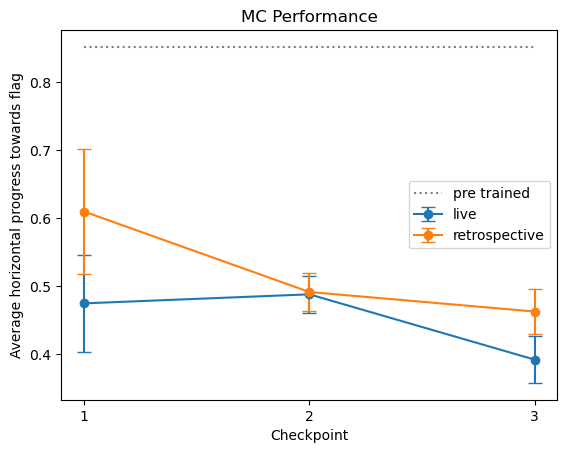

In [7]:
game = "mc"
plt.errorbar([1,2,3], grouped.loc[game].loc["live"]["performance_mean"], 
             yerr=grouped.loc[game].loc["live"]["performance_std"], label="live",
             capsize=5, marker='o')
plt.errorbar([1,2,3], grouped.loc[game].loc["retrospective"]["performance_mean"], 
             yerr=grouped.loc[game].loc["retrospective"]["performance_std"], label="retrospective",
             capsize=5, marker='o')
plt.plot([1,3], [0.8518,0.8518], c='grey', ls=':', label='pre trained')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average horizontal progress towards flag")
plt.title("MC Performance")
plt.legend()

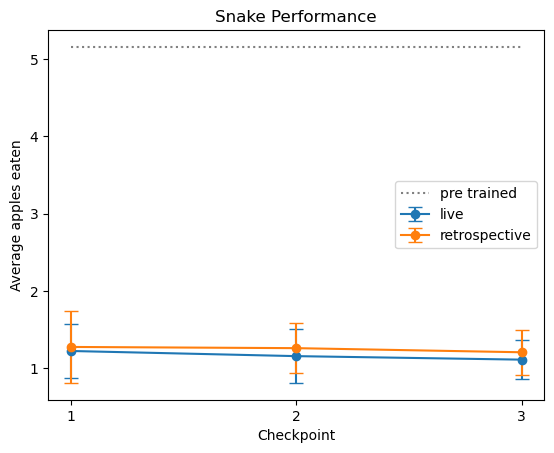

In [8]:
game = "snake"
plt.errorbar([1,2,3], grouped.loc[game].loc["live"]["performance_mean"], 
             yerr=grouped.loc[game].loc["live"]["performance_std"], label="live",
             capsize=5, marker='o')
plt.errorbar([1,2,3], grouped.loc[game].loc["retrospective"]["performance_mean"], 
             yerr=grouped.loc[game].loc["retrospective"]["performance_std"], label="retrospective",
             capsize=5, marker='o')

plt.plot([1,3], [5.16,5.16], c='grey', ls=':', label='pre trained')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average apples eaten")
plt.title("Snake Performance")
plt.legend()

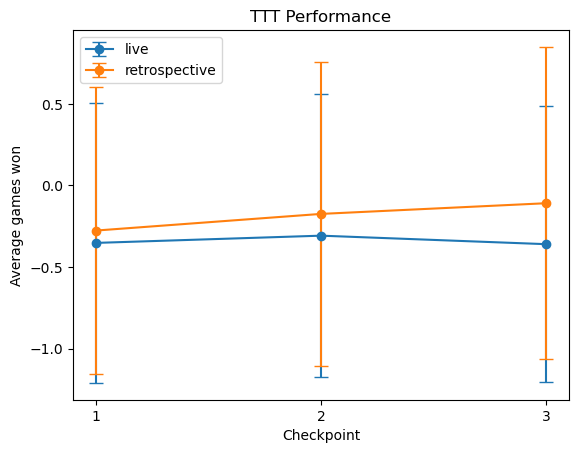

In [9]:
game = "ttt"
plt.errorbar([1,2,3], grouped.loc[game].loc["live"]["performance_mean"], 
             yerr=grouped.loc[game].loc["live"]["performance_std"], label="live",
             capsize=5, marker='o')
plt.errorbar([1,2,3], grouped.loc[game].loc["retrospective"]["performance_mean"], 
             yerr=grouped.loc[game].loc["retrospective"]["performance_std"], label="retrospective",
             capsize=5, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average games won")
plt.title("TTT Performance")
plt.legend()

### Per user performance for all lives vs for all retrospectives 

In [10]:
gr = df.groupby(["mode", "game", "user", "iter"]).mean()

In [11]:
gr

performance_mean  performance_std  \
mode          game user   iter                                      
live          mc   Frog   1             0.571825         0.210363   
                          2             0.521454         0.034603   
                          3             0.404242         0.056524   
                   Mob    1             0.386299         0.033418   
                          2             0.387039         0.029377   
...                                          ...              ...   
retrospective ttt  Tomato 2            -0.680000         0.691086   
                          3            -0.430000         0.839702   
                   morf   1            -0.150000         0.931397   
                          2             0.090000         0.990909   
                          3            -0.100000         0.974679   

                                frequency_overall  frequency_good_bad  \
mode          game user   iter                                          
live          mc   Frog   1              0.013333            0.333333   
                          2              0.020000            0.500000   
                          3              0.056667            0.000000   
                   Mob    1              0.016667            1.500000   
                          2              0.016667            0.250000   
...                                           ...                 ...   
retrospective ttt  Tomato 2             -1.000000           -1.000000   
                          3             -1.000000           -1.000000   
                   morf   1             -1.000000           -1.000000   
                          2             -1.000000           -1.000000   
                          3             -1.000000           -1.000000   

                                timing_overall  timing_good  timing_bad  
mode          game user   iter                                           
live          mc   Frog   1         118.500000        174.0  100.000000  
                          2         129.333333        127.0  130.500000  
                          3          79.470588         -1.0   79.470588  
                   Mob    1         167.600000        156.0  185.000000  
                          2         157.200000        254.0  133.000000  
...                                        ...          ...         ...  
retrospective ttt  Tomato 2          -1.000000         -1.0   -1.000000  
                          3          -1.000000         -1.0   -1.000000  
                   morf   1          -1.000000         -1.0   -1.000000  
                          2          -1.000000         -1.0   -1.000000  
                          3          -1.000000         -1.0   -1.000000  

[162 rows x 7 columns]

Text(0.5, 1.0, 'Live MC Performance per User')

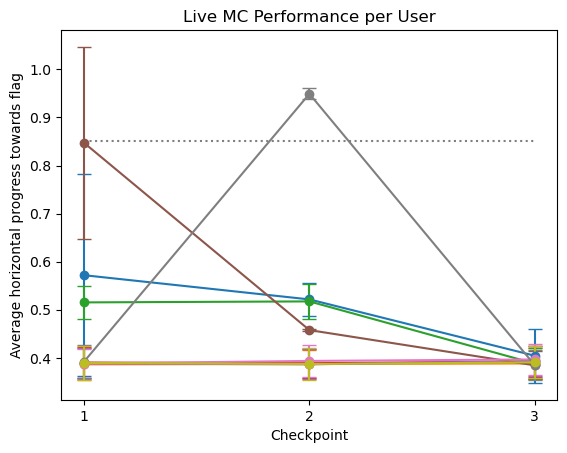

In [12]:
game = "mc"
mode = "live"
for user in usernames:
    plt.errorbar([1,2,3], gr.loc["live"].loc[game].loc[user]["performance_mean"], 
             yerr=gr.loc["live"].loc[game].loc[user]["performance_std"], label=user,
             capsize=5, marker='o')
plt.plot([1,3], [0.8518,0.8518], c='grey', ls=':', label='pre trained')

plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average horizontal progress towards flag")
plt.title("Live MC Performance per User")    
#plt.legend()

Text(0.5, 1.0, 'Live MC Performance per User')

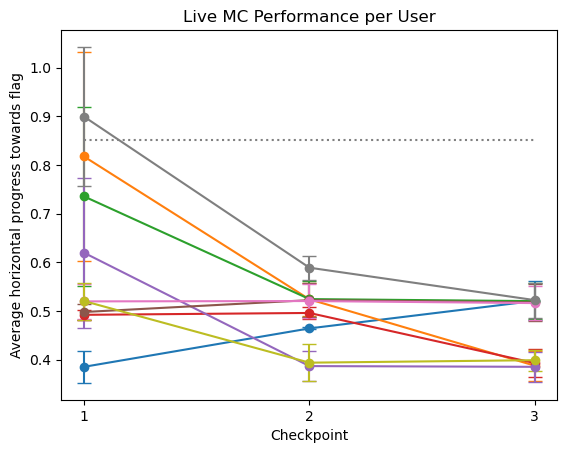

In [13]:
game = "mc"
mode = "retrospective"
for user in usernames:
    plt.errorbar([1,2,3], gr.loc[mode].loc[game].loc[user]["performance_mean"], 
             yerr=gr.loc[mode].loc[game].loc[user]["performance_std"], label=user,
             capsize=5, marker='o')
plt.plot([1,3], [0.8518,0.8518], c='grey', ls=':', label='pre trained')

plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average horizontal progress towards flag")
plt.title("Live MC Performance per User")    
#plt.legend()

Text(0.5, 1.0, 'Live-Retrospective MC Performance per User')

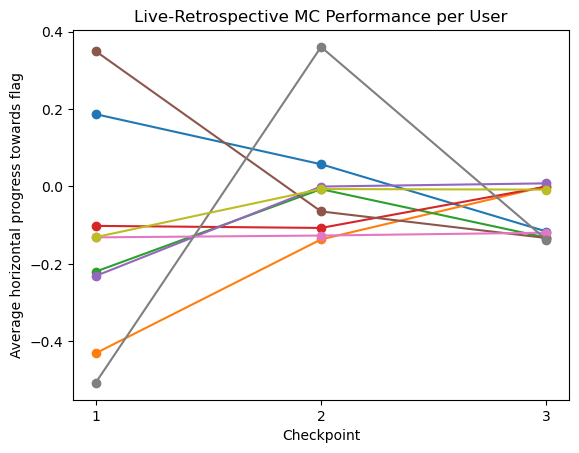

In [14]:
game = "mc"
for user in usernames:
    plt.plot([1,2,3], gr.loc["live"].loc[game].loc[user]["performance_mean"]-gr.loc["retrospective"].loc[game].loc[user]["performance_mean"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average horizontal progress towards flag")
plt.title("Live-Retrospective MC Performance per User")    
#plt.legend()

Text(0.5, 1.0, 'Live Snake Performance per User')

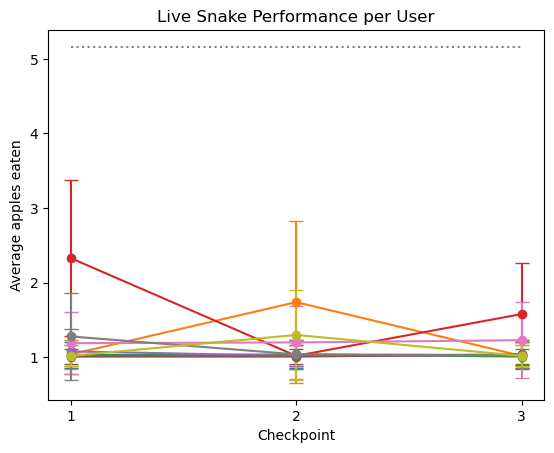

In [15]:
game = "snake"
mode = "live"
for user in usernames:
    plt.errorbar([1,2,3], gr.loc[mode].loc[game].loc[user]["performance_mean"], 
             yerr=gr.loc[mode].loc[game].loc[user]["performance_std"], label=user,
             capsize=5, marker='o')
plt.plot([1,3], [5.16,5.16], c='grey', ls=':', label='pre trained')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average apples eaten")
plt.title("Live Snake Performance per User")    
#plt.legend()

Text(0.5, 1.0, 'Retrospective Snake Performance per User')

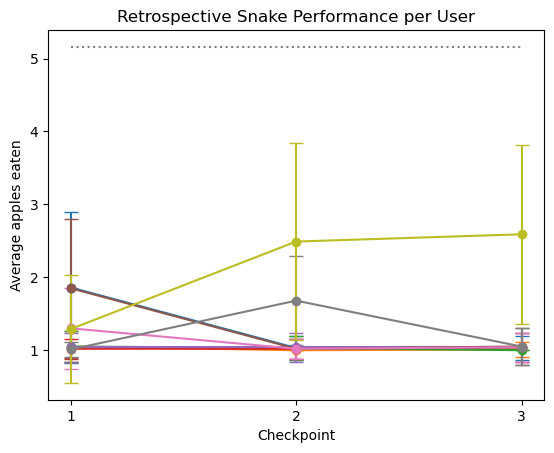

In [16]:
game = "snake"
mode = "retrospective"
for user in usernames:
    plt.errorbar([1,2,3], gr.loc[mode].loc[game].loc[user]["performance_mean"], 
             yerr=gr.loc[mode].loc[game].loc[user]["performance_std"], label=user,
             capsize=5, marker='o')
plt.plot([1,3], [5.16,5.16], c='grey', ls=':', label='pre trained')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average apples eaten")
plt.title("Retrospective Snake Performance per User")    
#plt.legend()

Text(0.5, 1.0, 'Live-Retrospective Snake Performance per User')

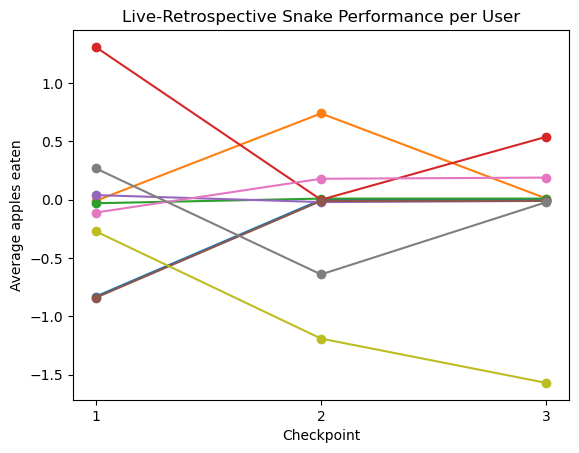

In [17]:
game = "snake"
for user in usernames:
    plt.plot([1,2,3], gr.loc["live"].loc[game].loc[user]["performance_mean"]-gr.loc["retrospective"].loc[game].loc[user]["performance_mean"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average apples eaten")
plt.title("Live-Retrospective Snake Performance per User")    
#plt.legend()

Text(0.5, 1.0, 'Live TTT Performance per User')

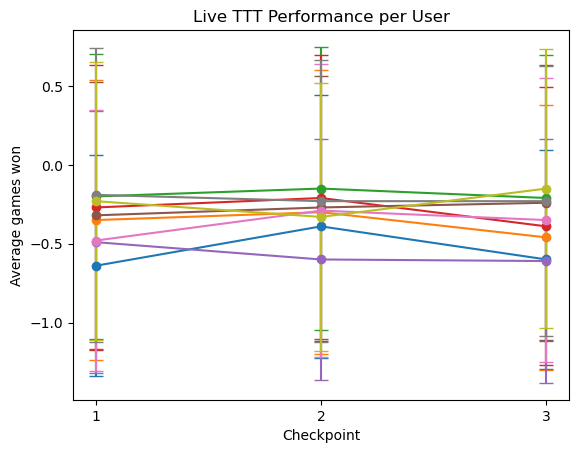

In [18]:
game = "ttt"
mode = "live"
for user in usernames:
    plt.errorbar([1,2,3], gr.loc[mode].loc[game].loc[user]["performance_mean"], 
             yerr=gr.loc[mode].loc[game].loc[user]["performance_std"], label=user,
             capsize=5, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average games won")
plt.title("Live TTT Performance per User")    
#plt.legend()

Text(0.5, 1.0, 'Retrospective TTT Performance per User')

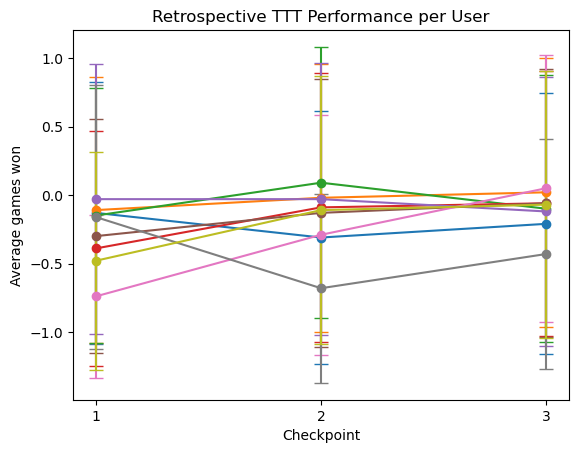

In [19]:
game = "ttt"
mode = "retrospective"
for user in usernames:
    plt.errorbar([1,2,3], gr.loc[mode].loc[game].loc[user]["performance_mean"], 
             yerr=gr.loc[mode].loc[game].loc[user]["performance_std"], label=user,
             capsize=5, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average games won")
plt.title("Retrospective TTT Performance per User")    
#plt.legend()

Text(0.5, 1.0, 'Live-Retrospective TTT Performance per User')

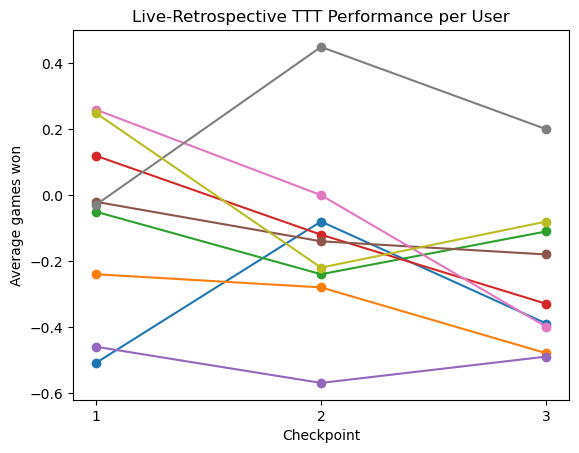

In [20]:
game = "ttt"
for user in usernames:
    plt.plot([1,2,3], gr.loc["live"].loc[game].loc[user]["performance_mean"]-gr.loc["retrospective"].loc[game].loc[user]["performance_mean"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average games won")
plt.title("Live-Retrospective TTT Performance per User")    
#plt.legend()

# Frequency

### Average frequency for live vs retrospective

In [21]:
grouped = df.groupby(['game', "mode", 'iter']).mean()
grouped_sd = df.groupby(['game', "mode", 'iter']).std()

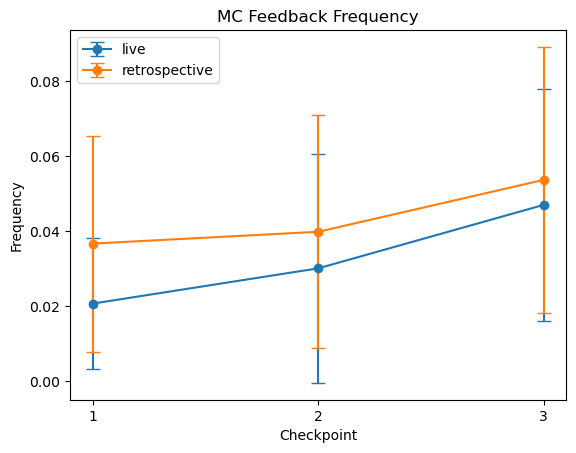

In [22]:
game = "mc"
plt.errorbar([1,2,3], grouped.loc[game].loc["live"]["frequency_overall"], 
             yerr=grouped_sd.loc[game].loc["live"]["frequency_overall"], label="live",
             capsize=5, marker='o')
plt.errorbar([1,2,3], grouped.loc[game].loc["retrospective"]["frequency_overall"], 
             yerr=grouped_sd.loc[game].loc["retrospective"]["frequency_overall"], label="retrospective",
             capsize=5, marker='o')

plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Frequency")
plt.title("MC Feedback Frequency")
plt.legend()

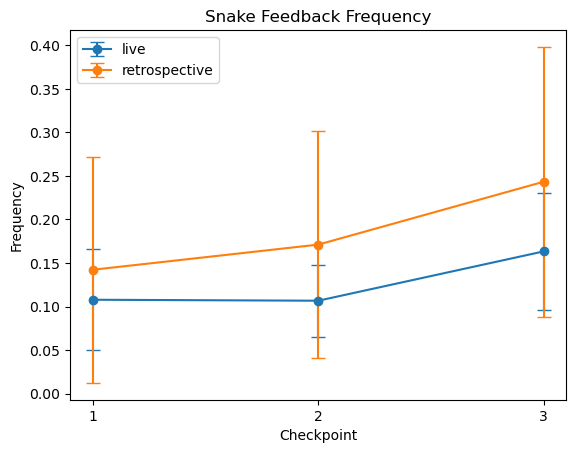

In [23]:
game = "snake"
plt.errorbar([1,2,3], grouped.loc[game].loc["live"]["frequency_overall"], 
             yerr=grouped_sd.loc[game].loc["live"]["frequency_overall"], label="live",
             capsize=5, marker='o')
plt.errorbar([1,2,3], grouped.loc[game].loc["retrospective"]["frequency_overall"], 
             yerr=grouped_sd.loc[game].loc["retrospective"]["frequency_overall"], label="retrospective",
             capsize=5, marker='o')

plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Frequency")
plt.title("Snake Feedback Frequency")
plt.legend()

### Per user frequency 

In [24]:
gr = df.groupby(["mode", "game", "user", "iter"]).mean()

Text(0.5, 1.0, 'Live MC Feedback Frequency per User')

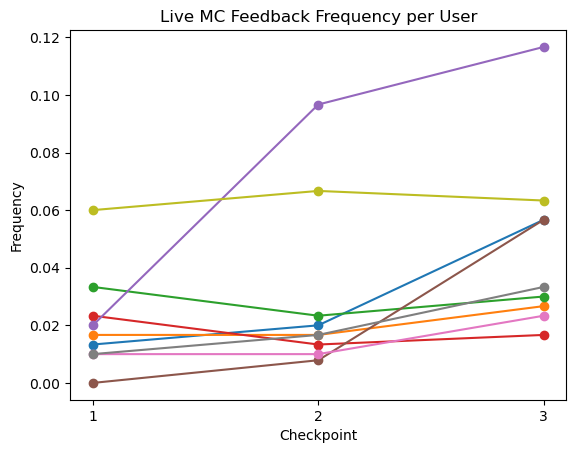

In [25]:
game = "mc"
mode = "live"
for user in usernames:
    plt.plot([1,2,3], gr.loc[mode].loc[game].loc[user]["frequency_overall"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Frequency")
plt.title("Live MC Feedback Frequency per User")    
#plt.legend()

Text(0.5, 1.0, 'Retrospective MC Feedback Frequency per User')

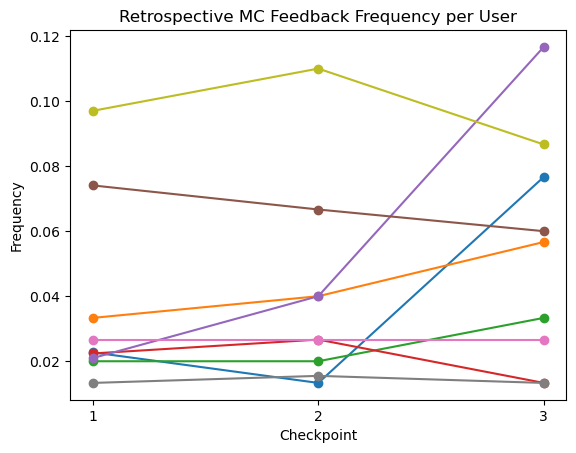

In [26]:
game = "mc"
mode = "retrospective"
for user in usernames:
    plt.plot([1,2,3], gr.loc[mode].loc[game].loc[user]["frequency_overall"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Frequency")
plt.title("Retrospective MC Feedback Frequency per User")    
#plt.legend()

Text(0.5, 1.0, 'Live-Retrospective MC Feedback Frequency per User')

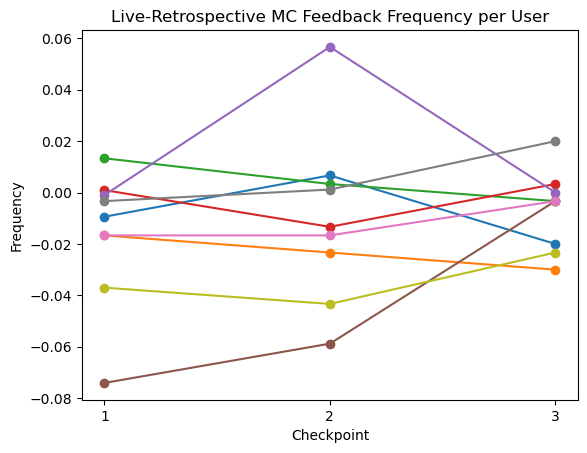

In [27]:
game = "mc"
for user in usernames:
    plt.plot([1,2,3], gr.loc["live"].loc[game].loc[user]["frequency_overall"]-gr.loc["retrospective"].loc[game].loc[user]["frequency_overall"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Frequency")
plt.title("Live-Retrospective MC Feedback Frequency per User")    
#plt.legend()

Text(0.5, 1.0, 'Live Snake Feedback Frequency per User')

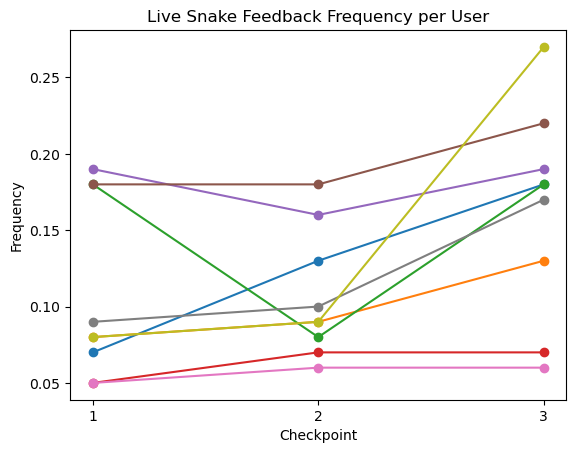

In [28]:
game = "snake"
mode = "live"
for user in usernames:
    plt.plot([1,2,3], gr.loc[mode].loc[game].loc[user]["frequency_overall"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Frequency")
plt.title("Live Snake Feedback Frequency per User")    
#plt.legend()

Text(0.5, 1.0, 'Retrospective Snake Feedback Frequency per User')

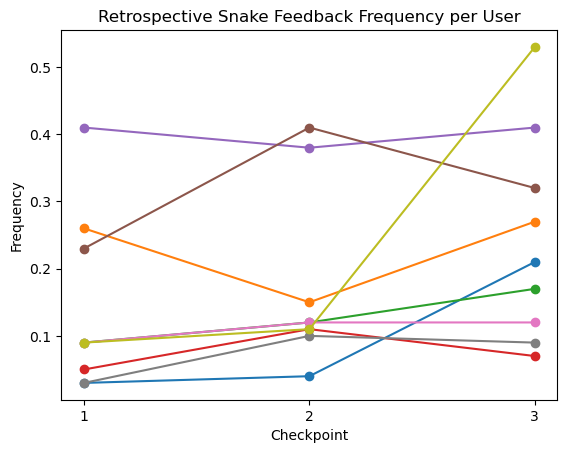

In [29]:
game = "snake"
mode = "retrospective"
for user in usernames:
    plt.plot([1,2,3], gr.loc[mode].loc[game].loc[user]["frequency_overall"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Frequency")
plt.title("Retrospective Snake Feedback Frequency per User")    
#plt.legend()

Text(0.5, 1.0, 'Live-Retrospective Snake Feedback Frequency per User')

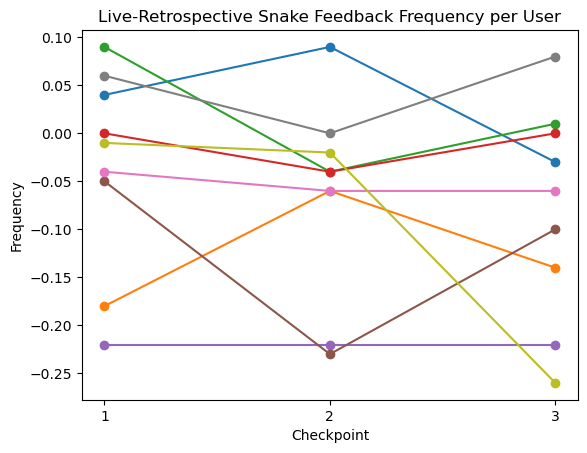

In [34]:
game = "snake"
for user in usernames:
    plt.plot([1,2,3], gr.loc["live"].loc[game].loc[user]["frequency_overall"]-gr.loc["retrospective"].loc[game].loc[user]["frequency_overall"], 
             label=user, marker='o')
plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Frequency")
plt.title("Live-Retrospective Snake Feedback Frequency per User")    
#plt.legend()

# Timing

In [31]:
grouped = df.groupby(['game', "mode", 'iter']).mean()
grouped_sd = df.groupby(['game', "mode", 'iter']).std()

In [38]:
df[df['game']=='mc']

,user,mode,game,iter,performance_mean,performance_std,frequency_overall,frequency_good_bad,timing_overall,timing_good,timing_bad,timing_good_indices,timing_bad_indices
6,Frog,retrospective,mc,1,0.385015,0.033047,0.022727,inf,13.000000,13.000000,-1.000000,"24, 16, -1",NaN
7,Frog,retrospective,mc,2,0.463985,0.002041,0.013333,0.000000,147.000000,-1.000000,147.000000,NaN,"248, 183, 113, 44"
8,Frog,retrospective,mc,3,0.520534,0.040028,0.076667,0.000000,124.695652,-1.000000,124.695652,NaN,"234, 204, 195, 187, 179, 171, 163, 155, 148, 1..."
15,Mob,retrospective,mc,1,0.817201,0.214310,0.033333,0.000000,132.200000,-1.000000,132.200000,NaN,"259, 234, 204, 176, 148, 120, 92, 63, 27, -1"
16,Mob,retrospective,mc,2,0.523733,0.033316,0.040000,0.000000,121.083333,-1.000000,121.083333,NaN,"267, 246, 184, 177, 150, 126, 110, 74, 59, 39,..."
17,Mob,retrospective,mc,3,0.387347,0.030825,0.056667,0.416667,149.647059,170.000000,141.166667,"272, 264, 253, 34, 27","245, 234, 224, 216, 204, 179, 167, 112, 98, 12..."
24,morf,retrospective,mc,1,0.735237,0.183428,0.020000,2.000000,140.666667,154.750000,112.500000,"274, 197, 114, 34","226, -1"
25,morf,retrospective,mc,2,0.524192,0.037004,0.020000,2.000000,140.333333,152.500000,116.000000,"273, 189, 114, 34","223, 9"
26,morf,retrospective,mc,3,0.520036,0.036691,0.033333,1.500000,169.300000,158.833333,185.000000,"258, 194, 184, 175, 106, 36","227, 216, 155, 142"
33,Red,retrospective,mc,1,0.491873,0.010666,0.022388,2.000000,37.666667,36.500000,40.000000,"67, 6",40


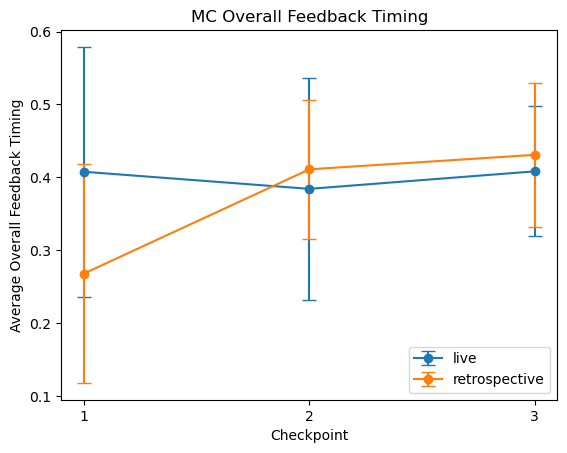

In [32]:
game = "mc"
frames = 300
plt.errorbar([1,2,3], grouped.loc[game].loc["live"]["timing_overall"]/frames, 
             yerr=grouped_sd.loc[game].loc["live"]["timing_overall"]/(frames^2), label="live",
             capsize=5, marker='o')
plt.errorbar([1,2,3], grouped.loc[game].loc["retrospective"]["timing_overall"]/frames, 
             yerr=grouped_sd.loc[game].loc["retrospective"]["timing_overall"]/(frames^2), label="retrospective",
             capsize=5, marker='o')

plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average Overall Feedback Timing")
plt.title("MC Overall Feedback Timing")
plt.legend()

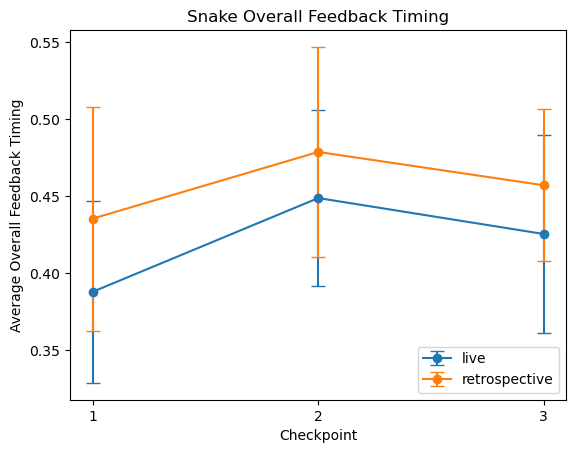

In [33]:
game = "snake"
frames = 100
plt.errorbar([1,2,3], grouped.loc[game].loc["live"]["timing_overall"]/frames, 
             yerr=grouped_sd.loc[game].loc["live"]["timing_overall"]/(frames^2), label="live",
             capsize=5, marker='o')
plt.errorbar([1,2,3], grouped.loc[game].loc["retrospective"]["timing_overall"]/frames, 
             yerr=grouped_sd.loc[game].loc["retrospective"]["timing_overall"]/(frames^2), label="retrospective",
             capsize=5, marker='o')

plt.xlabel("Checkpoint")
plt.xticks([1,2,3])
plt.ylabel("Average Overall Feedback Timing")
plt.title("Snake Overall Feedback Timing")
plt.legend()

### Good/bad histograms

Text(0.5, 1.0, 'Good vs Bad Feedback Timing for MC')

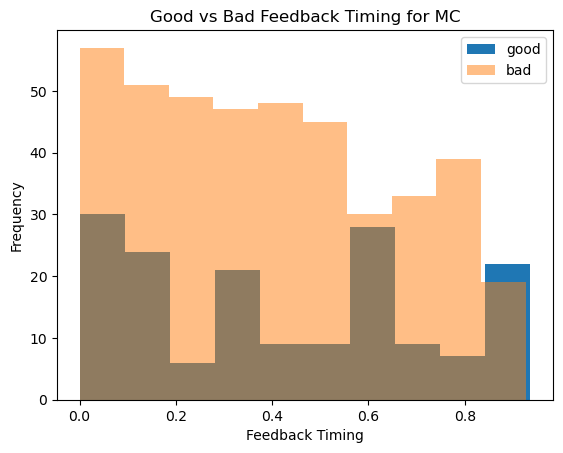

In [256]:
sub = df[df['game']=='mc']
total_good = []
total_bad = []
frames=300
for i in range(len(sub)):
    good = sub.iloc[i]['timing_good_indices']
    bad = sub.iloc[i]['timing_bad_indices']
    good_ls = []
    bad_ls = []
    if good is not np.nan and good!="None":
        good_ls = good.split(", ")
        good_ls = [(int(x)+1)/frames for x in good_ls]
    if bad is not np.nan and bad!="None":
        bad_ls = bad.split(", ")
        bad_ls = [(int(x)+1)/frames for x in bad_ls]
    total_good+=good_ls
    total_bad+=bad_ls
_ = plt.hist(total_good, alpha=1, label="good")
_ = plt.hist(total_bad, alpha=0.5, label="bad")
plt.xlabel("Feedback Timing")
plt.ylabel("Frequency")
plt.legend()
plt.title("Good vs Bad Feedback Timing for MC")

Text(0.5, 1.0, 'Good vs Bad Feedback Timing for MC Live')

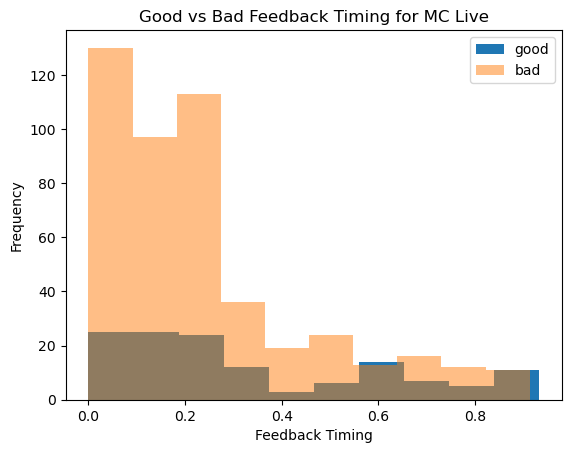

In [257]:
sub = df[df['game']=='mc']
sub = df[df['mode']=='live']
total_good = []
total_bad = []
frames=300
for i in range(len(sub)):
    good = sub.iloc[i]['timing_good_indices']
    bad = sub.iloc[i]['timing_bad_indices']
    good_ls = []
    bad_ls = []
    if good is not np.nan and good!="None":
        good_ls = good.split(", ")
        good_ls = [(int(x)+1)/frames for x in good_ls]
    if bad is not np.nan and bad!="None":
        bad_ls = bad.split(", ")
        bad_ls = [(int(x)+1)/frames for x in bad_ls]
    total_good+=good_ls
    total_bad+=bad_ls
_ = plt.hist(total_good, alpha=1, label="good")
_ = plt.hist(total_bad, alpha=0.5, label="bad")
plt.xlabel("Feedback Timing")
plt.ylabel("Frequency")
plt.legend()
plt.title("Good vs Bad Feedback Timing for MC Live")

Text(0.5, 1.0, 'Good vs Bad Feedback Timing for MC Retrospective')

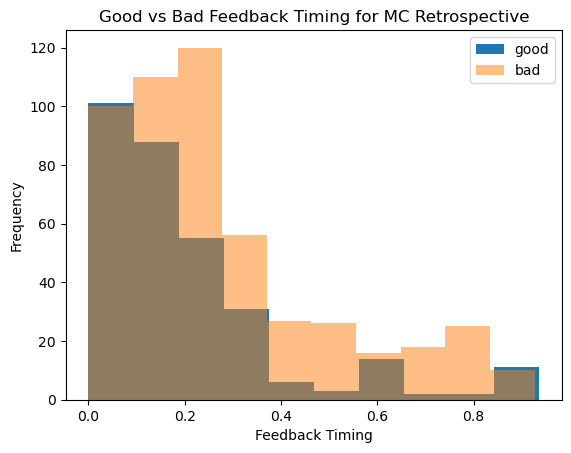

In [258]:
sub = df[df['game']=='mc']
sub = df[df['mode']=='retrospective']
total_good = []
total_bad = []
frames=300
for i in range(len(sub)):
    good = sub.iloc[i]['timing_good_indices']
    bad = sub.iloc[i]['timing_bad_indices']
    good_ls = []
    bad_ls = []
    if good is not np.nan and good!="None":
        good_ls = good.split(", ")
        good_ls = [(int(x)+1)/frames for x in good_ls]
    if bad is not np.nan and bad!="None":
        bad_ls = bad.split(", ")
        bad_ls = [(int(x)+1)/frames for x in bad_ls]
    total_good+=good_ls
    total_bad+=bad_ls
_ = plt.hist(total_good, alpha=1, label="good")
_ = plt.hist(total_bad, alpha=0.5, label="bad")
plt.xlabel("Feedback Timing")
plt.ylabel("Frequency")
plt.legend()
plt.title("Good vs Bad Feedback Timing for MC Retrospective")

Text(0.5, 1.0, 'Good vs Bad Feedback Timing for Snake')

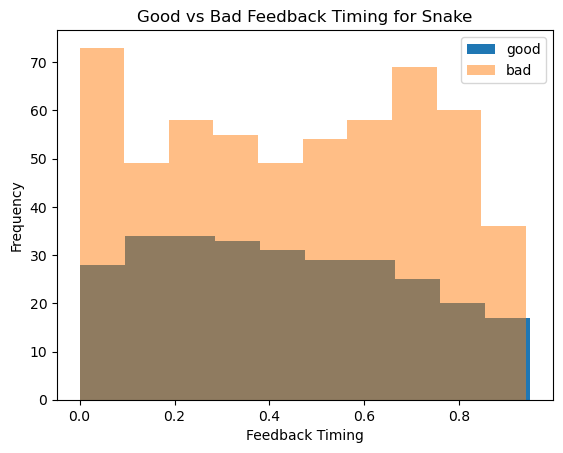

In [259]:
sub = df[df['game']=='snake']
total_good = []
total_bad = []
frames=100
for i in range(len(sub)):
    good = sub.iloc[i]['timing_good_indices']
    bad = sub.iloc[i]['timing_bad_indices']
    good_ls = []
    bad_ls = []
    if good is not np.nan and good!="None":
        good_ls = good.split(", ")
        good_ls = [(int(x)+1)/frames for x in good_ls]
    if bad is not np.nan and bad!="None":
        bad_ls = bad.split(", ")
        bad_ls = [(int(x)+1)/frames for x in bad_ls]
    total_good+=good_ls
    total_bad+=bad_ls
_ = plt.hist(total_good, alpha=1, label="good")
_ = plt.hist(total_bad, alpha=0.5, label="bad")
plt.xlabel("Feedback Timing")
plt.ylabel("Frequency")
plt.legend()
plt.title("Good vs Bad Feedback Timing for Snake")

Text(0.5, 1.0, 'Good vs Bad Feedback Timing for Snake Live')

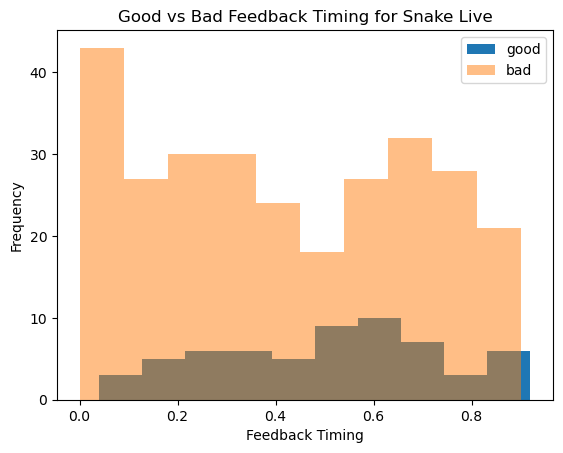

In [260]:
sub = df[df['game']=='snake']
sub = sub[sub['mode']=='live']
total_good = []
total_bad = []
frames=100
for i in range(len(sub)):
    good = sub.iloc[i]['timing_good_indices']
    bad = sub.iloc[i]['timing_bad_indices']
    good_ls = []
    bad_ls = []
    if good is not np.nan and good!="None":
        good_ls = good.split(", ")
        good_ls = [(int(x)+1)/frames for x in good_ls]
    if bad is not np.nan and bad!="None":
        bad_ls = bad.split(", ")
        bad_ls = [(int(x)+1)/frames for x in bad_ls]
    total_good+=good_ls
    total_bad+=bad_ls
_ = plt.hist(total_good, alpha=1, label="good")
_ = plt.hist(total_bad, alpha=0.5, label="bad")
plt.xlabel("Feedback Timing")
plt.ylabel("Frequency")
plt.legend()
plt.title("Good vs Bad Feedback Timing for Snake Live")

Text(0.5, 1.0, 'Good vs Bad Feedback Timing for Snake Retrospective')

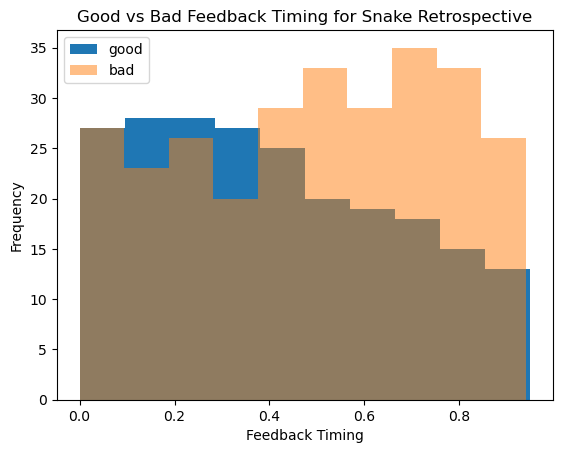

In [261]:
sub = df[df['game']=='snake']
sub = sub[sub['mode']=='retrospective']
total_good = []
total_bad = []
frames=100
for i in range(len(sub)):
    good = sub.iloc[i]['timing_good_indices']
    bad = sub.iloc[i]['timing_bad_indices']
    good_ls = []
    bad_ls = []
    if good is not np.nan and good!="None":
        good_ls = good.split(", ")
        good_ls = [(int(x)+1)/frames for x in good_ls]
    if bad is not np.nan and bad!="None":
        bad_ls = bad.split(", ")
        bad_ls = [(int(x)+1)/frames for x in bad_ls]
    total_good+=good_ls
    total_bad+=bad_ls
_ = plt.hist(total_good, alpha=1, label="good")
_ = plt.hist(total_bad, alpha=0.5, label="bad")
plt.xlabel("Feedback Timing")
plt.ylabel("Frequency")
plt.legend()
plt.title("Good vs Bad Feedback Timing for Snake Retrospective")

### live/retrospective scatterplots 

Text(0.5, 1.0, 'Feedback Timing for MC')

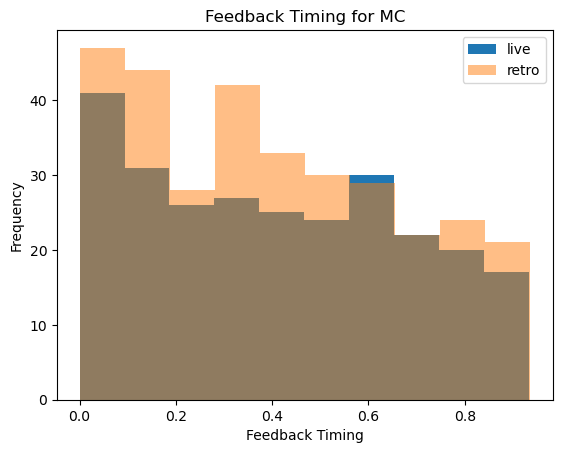

In [262]:
sub = df[df['game']=='mc']
total_live = []
total_retro = []
frames=300
for i in range(len(sub)):
    good = sub.iloc[i]['timing_good_indices']
    bad = sub.iloc[i]['timing_bad_indices']
    good_ls = []
    bad_ls = []
    if good is not np.nan and good!="None":
        good_ls = good.split(", ")
        good_ls = [(int(x)+1)/frames for x in good_ls]
    if bad is not np.nan and bad!="None":
        bad_ls = bad.split(", ")
        bad_ls = [(int(x)+1)/frames for x in bad_ls]
    
    if sub.iloc[i]['mode']=='live':
        total_live+=good_ls
        total_live+=bad_ls
    else:
        total_retro+=good_ls
        total_retro+=bad_ls
        
_ = plt.hist(total_live, alpha=1, label="live")
_ = plt.hist(total_retro, alpha=0.5, label="retro")
plt.xlabel("Feedback Timing")
plt.ylabel("Frequency")
plt.legend()
plt.title("Feedback Timing for MC")

Text(0.5, 1.0, 'Feedback Timing for MC')

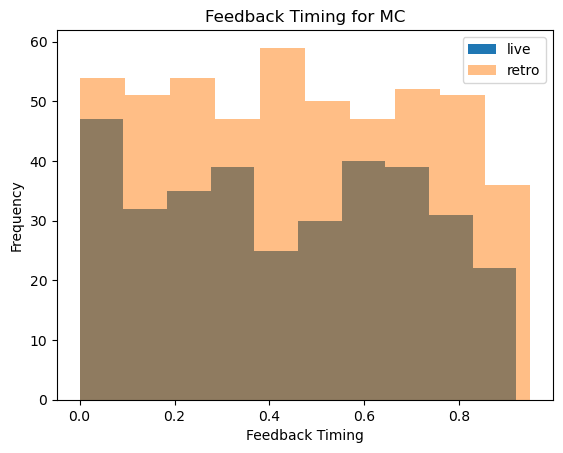

In [263]:
sub = df[df['game']=='snake']
total_live = []
total_retro = []
frames=100
for i in range(len(sub)):
    good = sub.iloc[i]['timing_good_indices']
    bad = sub.iloc[i]['timing_bad_indices']
    good_ls = []
    bad_ls = []
    if good is not np.nan and good!="None":
        good_ls = good.split(", ")
        good_ls = [(int(x)+1)/frames for x in good_ls]
    if bad is not np.nan and bad!="None":
        bad_ls = bad.split(", ")
        bad_ls = [(int(x)+1)/frames for x in bad_ls]
    
    if sub.iloc[i]['mode']=='live':
        total_live+=good_ls
        total_live+=bad_ls
    else:
        total_retro+=good_ls
        total_retro+=bad_ls
        
_ = plt.hist(total_live, alpha=1, label="live")
_ = plt.hist(total_retro, alpha=0.5, label="retro")
plt.xlabel("Feedback Timing")
plt.ylabel("Frequency")
plt.legend()
plt.title("Feedback Timing for MC")